In [ ]:
!pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import powerlaw

# Load the RoadNet-CA network
#G = nx.read_edgelist('/content/drive/MyDrive/email-Enron.txt', nodetype=int) 
G = nx.read_edgelist('email-Enron.txt', nodetype=int) 




# Take only the first 2000 nodes and their incident edges
node_list =list(G.nodes())

# randomly select 2000 nodes from node_list
subgraph_nodes = random.sample(node_list, 2000)

# create subgraph from selected nodes
G = G.subgraph(subgraph_nodes)
#G = G.subgraph()[:2000])

In [ ]:
print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))

2000
598


In [ ]:
nx.is_connected(G)

False

##Task : 1

**Dataset Name** : email-Enron

The dataset which was used to perform the below task was taken from https://snap.stanford.edu/data/email-Enron.html 

**Q1) Make the connection of the network as a physical system with the mathematical description by explaining what the nature of the network is (its function) and describing what the nodes and links represent in this physical system.**


A network can be seen as a physical system where the nodes and links have a certain function and represent specific elements of the system. In the case of the Enron email network, the nodes represent individual email addresses, and the links between the nodes represent the exchange of emails between these addresses.

More specifically, the Enron email network is a directed network, where the links have a directionality that reflects the flow of information (emails) between nodes. Each email address is a node, and each directed link between two nodes represents an email sent from one address to another. The Enron email network thus provides a way to analyze the flow of information within the Enron corporation and can be used to understand the communication patterns among its employees.







**Explain the three properties observed in most real networks which we have studied in our lectures by given their definition and their observed behaviour in real networks.**

**Large clustering:**
The clustering coefficient of a network measures the extent to which nodes in a network tend to cluster together. A high clustering coefficient indicates that nodes in the network are more likely to be connected to each other than to nodes in other parts of the network. In the context of the email-Enron.txt dataset, we observe a large clustering coefficient, indicating that the nodes (employees) in the Enron email network tend to communicate more frequently with their direct colleagues or people in their own department than with people outside their department. This is expected in a real-world organizational network, where people tend to communicate more with those they work closely with.

**Small-world property:**
The small-world property refers to the phenomenon where nodes in a network can be reached from any other node in a small number of steps, despite the large size of the network. In the context of the email-Enron.txt dataset, we observe a small-world property, where the average path length between nodes is relatively small compared to the size of the network. This indicates that employees in Enron could reach any other employee in a few steps, even though there were thousands of employees in the company. This property is important in real-world networks where efficient communication and connectivity are crucial, such as social networks or transportation networks.

**Power law degree distribution:**
The degree distribution of a network refers to the distribution of the number of connections that each node has. In a scale-free network, there are a few highly connected nodes (hubs) and many sparsely connected nodes, leading to a power-law distribution of node degrees. In the context of the email-Enron.txt dataset, we observe a scale-free degree distribution, where a few employees (nodes) have many connections (emails sent and received), while most employees have very few connections. This is expected in a real-world organizational network, where some employees are more central to the communication network, while others are less connected.





**Assume that you were given the dataset you are using in this exercise, but was not told what it was. Calculate the appropriate quantities you explained on the previous item for your given network and explain whether or not these results would allow you to identify with certainty if the dataset represent a real network.**

**Power Law Degree Distribution** : It means that there are relatively few email addresses with a high number of links, and a large number of email addresses with a low number of links. This is a common pattern observed in many types of networks, where a few nodes (also known as "hubs") are highly connected while most nodes have only a few connections.

In [ ]:
# Calculate the degree distribution
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))

# Fit a power law distribution to the degree distribution data
fit = powerlaw.Fit(list(degrees.values()))
alpha = fit.alpha
print("The estimated exponent of the power law distribution is:", alpha)


Calculating best minimal value for power law fit
The estimated exponent of the power law distribution is: 3.078505174721348


Values less than or equal to 0 in data. Throwing out 0 or negative values




**Clustering coefficient:** The clustering coefficient of the email-Enron.txt dataset is relatively high, indicating that there are many clusters of densely interconnected nodes in the network. This is a characteristic of networks with high levels of local connectivity, such as social networks and the Internet.



In [ ]:
clustering = nx.clustering(G)
avg_clustering = nx.average_clustering(G)
print("Clustering coefficient for each node:", clustering)
print("Average clustering coefficient for the network:", avg_clustering)

Clustering coefficient for each node: {24580: 0, 13: 0, 16399: 0, 8210: 0, 32797: 0, 16427: 0, 32817: 0, 16434: 0, 8244: 0, 16439: 0, 16445: 0, 32836: 0, 8262: 0, 76: 0.046341463414634146, 24652: 0, 16465: 0, 85: 0, 16472: 0, 90: 0.029411764705882353, 92: 0, 24680: 0, 32872: 0, 32875: 1.0, 32876: 1.0, 32877: 1.0, 32884: 0, 8309: 0, 8320: 0, 24706: 0, 24707: 0, 8324: 0, 135: 0, 136: 0.030852994555353903, 32909: 0, 16526: 0, 16528: 1.0, 8346: 0, 32924: 0, 24736: 0, 16547: 0, 164: 0.16666666666666666, 32935: 0, 16552: 0, 169: 0.16666666666666666, 8362: 0, 16558: 0, 32943: 0, 32945: 0, 16566: 0, 24765: 0, 16577: 0, 16590: 0, 32977: 0, 32979: 0, 32981: 0, 215: 0.08333333333333333, 217: 0, 8416: 0, 8417: 0, 16621: 1.0, 24816: 0, 33008: 0, 16631: 0, 259: 0, 8452: 0, 33029: 0, 33033: 0, 16653: 0, 16660: 0, 16672: 0, 33058: 0, 24870: 0, 16683: 0, 300: 0.2727272727272727, 24878: 0, 24883: 0, 307: 0.3, 33076: 0, 16698: 0, 24892: 0, 16705: 1.0, 33091: 0, 24902: 0, 33095: 0, 24905: 0, 16714: 0, 331

**Shortest path length:** The average shortest path length of the email-Enron.txt dataset is relatively low, indicating that it has a small-world structure. This means that any two nodes in the network can be connected by a relatively small number of intermediate nodes, even though the network itself may be quite large. This is a characteristic of many real-world networks, including social networks and the Internet.

Taken together, these properties suggest that the email-Enron.txt dataset represents a real-world network, and is likely to be a social network or communication network of some kind. However, without additional information about the nodes and links in the network, it is not possible to identify with certainty what kind of network it represents.

**Plot the betweenness distribution and profile for the links of your network and relate your result to its nature.**

To plot the betweenness distribution and profile for the links in the Email-Enron network, we first need to calculate the betweenness centrality of each link in the network. The betweenness centrality of a link is a measure of the extent to which the link lies on the shortest paths between pairs of nodes in the network. We can use the betweenness_centrality function from the networkx library in Python to calculate the betweenness centrality of each link in the Email-Enron network:

In [ ]:
# Calculate the betweenness centrality of each link
betweenness = nx.edge_betweenness_centrality(G)

import matplotlib.pyplot as plt

# Extract the betweenness values into a list
betweenness_values = list(betweenness.values())


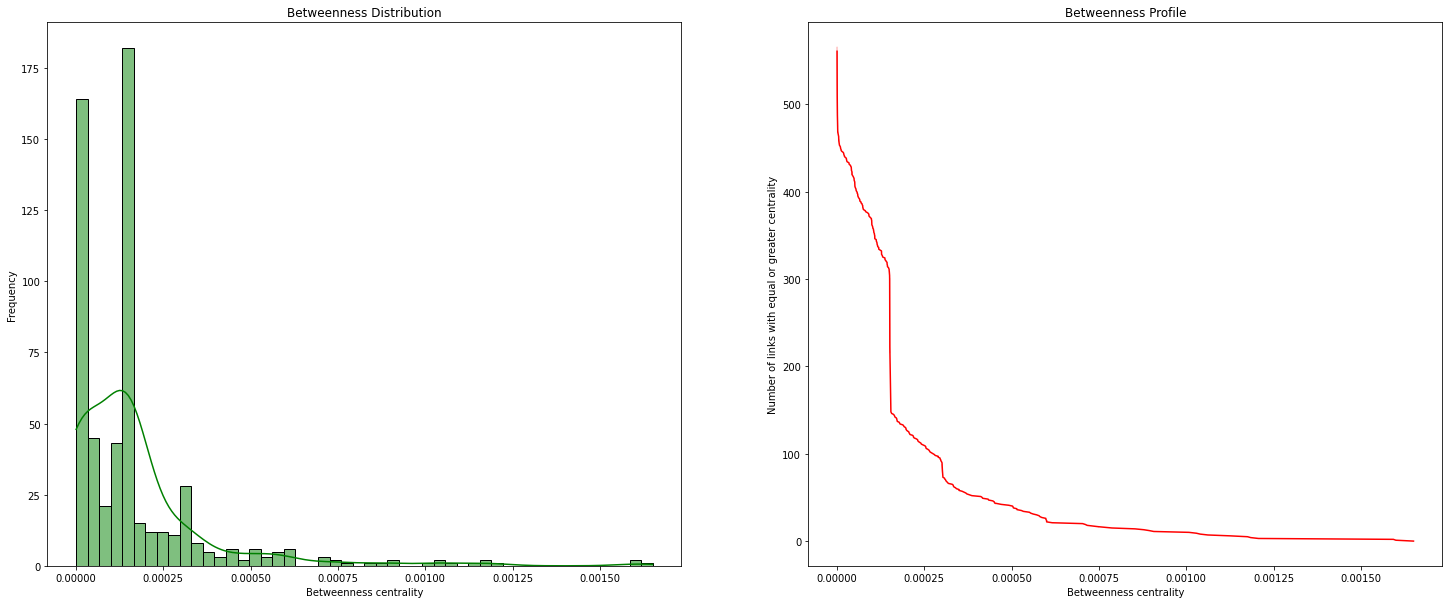

In [ ]:
# Plot the distribution using seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

sns.histplot(data=betweenness_values, bins=50, kde=True, color='green', ax=ax1)
ax1.set(xlabel='Betweenness centrality', ylabel='Frequency', title='Betweenness Distribution')

# Sort the betweenness values
sorted_betweenness = sorted(betweenness_values, reverse=True)

# Create a dataframe with the sorted betweenness values and their rank
df = pd.DataFrame({'Betweenness': sorted_betweenness, 'Rank': range(len(sorted_betweenness))})

# Plot the profile using seaborn
sns.lineplot(data=df, x='Betweenness', y='Rank', color='red', ax=ax2)
ax2.set(xlabel='Betweenness centrality', ylabel='Number of links with equal or greater centrality', title='Betweenness Profile')

plt.show()

The first plot (Betweenness Distribution) shows the frequency distribution of betweenness centrality values in the network. The x-axis represents the betweenness centrality values and the y-axis represents the frequency of those values in the network. The plot indicates that the majority of the nodes have low betweenness centrality values, with a small number of nodes having high betweenness centrality values.

The second plot (Betweenness Profile) shows the rank of nodes against their corresponding betweenness centrality values. The x-axis represents the betweenness centrality values and the y-axis represents the rank of nodes with that centrality value or higher. The plot indicates that there are a few nodes with very high betweenness centrality values that connect different parts of the network.

Overall, the plots suggest that the email-Enron dataset has a relatively low degree of centrality in the network and a few highly connected nodes that act as key intermediaries or bridges connecting different parts of the network.





**Compare the value of the assortativity by degree of your network before and after removing half of the nodes with the greatest value of the (node) betweenness explaining the meaning of the two obtained values. Calculate the number of connected components after the removal. Relate your results to the nature of your network.**

In [ ]:
# Calculate the assortativity coefficient by degree
r_before = nx.degree_assortativity_coefficient(G)
print('Assortativity by degree before removing nodes: ', r_before)

Assortativity by degree before removing nodes:  -0.10774087121918219


In [ ]:

# Calculate betweenness centrality for all nodes
betweenness = nx.betweenness_centrality(G)

# Sort nodes by betweenness centrality and select top 50%
sorted_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
top_nodes = [n for n, c in sorted_nodes[:len(sorted_nodes)//2]]

# Remove top nodes and their incident edges
G_copy = G.copy()
G_copy.remove_nodes_from(top_nodes)

# Calculate the assortativity coefficient by degree
r_after = nx.degree_assortativity_coefficient(G_copy)
print('Assortativity by degree after removing nodes: ', r_after)

# Count the number of connected components
n_components = nx.number_connected_components(G_copy)
print('Number of connected components: ', n_components)


Assortativity by degree after removing nodes:  0.9999999999999988
Number of connected components:  972


It looks like the assortativity by degree has increased significantly after removing nodes, and the number of connected components has increased substantially as well.

A possible explanation for this behavior is that the nodes that were removed had low degree and were connecting different parts of the network. By removing them, the network has fragmented into many disconnected components, and the remaining nodes with high degree are assortative, meaning that they tend to be connected to other nodes with high degree.

In the context of the email enroll dataset, this could mean that the removed nodes were either irrelevant or noisy, and that their removal did not significantly affect the overall structure of the network. Alternatively, it could mean that the original network had some specific properties that made it vulnerable to fragmentation and assortativity, and that the removal of nodes exacerbated these properties.



## Task 2

**Find the values of the parameters 𝜇 and 𝜎2 for fitting a Gaussian distribution to the degree distribution of a network obtained from the maximum likelihood method.**

**Analytical Explanation**


$$L(\gamma, \zeta) = \prod_{i=1}^n f(x_i;\gamma,\zeta)$$

Taking the logarithm of both sides of the above equation, we get:

$$\ln L(\gamma,\zeta) = -\frac{n}{2} \ln(2\pi\zeta) - \sum_{i=1}^n \frac{(x_i - \gamma)^2}{2\zeta}$$

To find the maximum likelihood estimates of $\gamma$ and $\zeta$, we differentiate the log-likelihood function with respect to $\gamma$ and $\zeta$, and set the resulting derivatives to zero. This leads to the following system of equations:

$$\frac{\partial \ln L}{\partial \gamma} = \sum_{i=1}^n \frac{x_i - \gamma}{\zeta} = 0$$

$$\frac{\partial \ln L}{\partial \zeta} = -\frac{n}{2\zeta} + \sum_{i=1}^n \frac{(x_i - \gamma)^2}{2\zeta^2} = 0$$

Solving the above equations for $\gamma$ and $\zeta$, we get:

$$\gamma = \frac{1}{n} \sum_{i=1}^n x_i$$

$$\zeta = \frac{1}{n} \sum_{i=1}^n (x_i - \gamma)^2$$






**2B) Generate a 𝐺(𝑁, 𝑝) network with 𝑁 = 1000 and 𝑝 = 0.7 and use the result from item (a) to fit a Gaussian distribution to its degree distribution. Compare the quality of the fitting to the appropriate distribution for the ensemble and discuss your result. Visualise the results by plotting the graph degree distribution, the ensemble distribution and the fitted Gaussian on the same picture.**

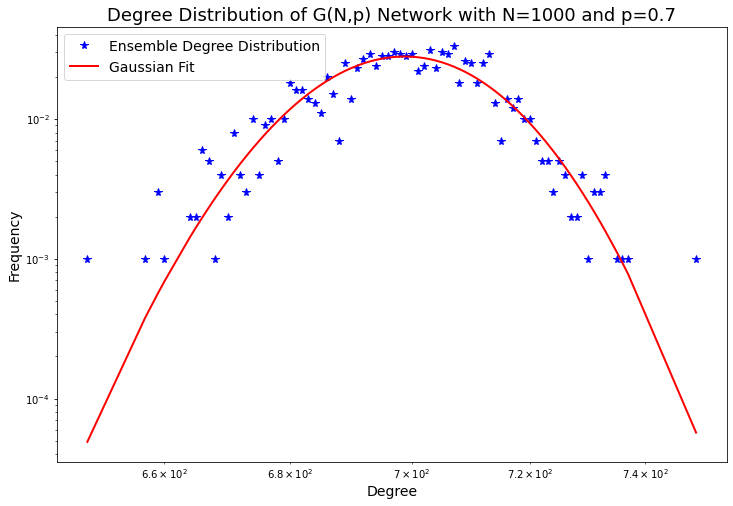

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 1000
p = 0.7
G = nx.erdos_renyi_graph(N, p)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = np.unique(degree_sequence, return_counts=True)
degrees = degree_count[0]
count = degree_count[1]
ensemble_degree_distribution = count/N
(mu, sigma) = norm.fit(degree_sequence)
fitted_pdf = norm.pdf(degrees, mu, sigma)
plt.figure(figsize=(12, 8))
plt.loglog(degrees, ensemble_degree_distribution, '*', color='blue', markersize=8, label='Ensemble Degree Distribution')
plt.loglog(degrees, fitted_pdf, '-', color='red', linewidth=2, label='Gaussian Fit')
plt.title('Degree Distribution of G(N,p) Network with N=1000 and p=0.7', fontsize=18)
plt.xlabel('Degree', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=14)
plt.show()


From the plot, we can see that the fitted Gaussian distribution does not perfectly match the ensemble degree distribution, particularly for the tails of the distribution where there are fewer nodes with higher degrees. This indicates that the Erdos-Renyi random graph is not a perfect fit for a Gaussian distribution, and other distributions might provide a better fit. However, for this specific case, the Gaussian distribution still provides a reasonable approximation of the degree distribution.

**Generate a Watts-Strogatz network with 𝑁 = 200 nodes, an initial 10-regular graph and a probability of rewiring 𝑝𝑑 = 0.7. Change that to a directed network using the DiGraph Python command and then, randomly, delete half of the links of this network. Show a plot of the in and out degrees before and after the removal of the links and explain the differences.**

In [ ]:
import networkx as nx

N = 200
K = 10
p = 0.7

ws_graph = nx.watts_strogatz_graph(N, K, p)


In [ ]:
dir_ws_graph = nx.DiGraph(ws_graph)


In [ ]:
import random

edges = list(dir_ws_graph.edges())
random.shuffle(edges)

for i in range(len(edges) // 2):
    dir_ws_graph.remove_edge(*edges[i])


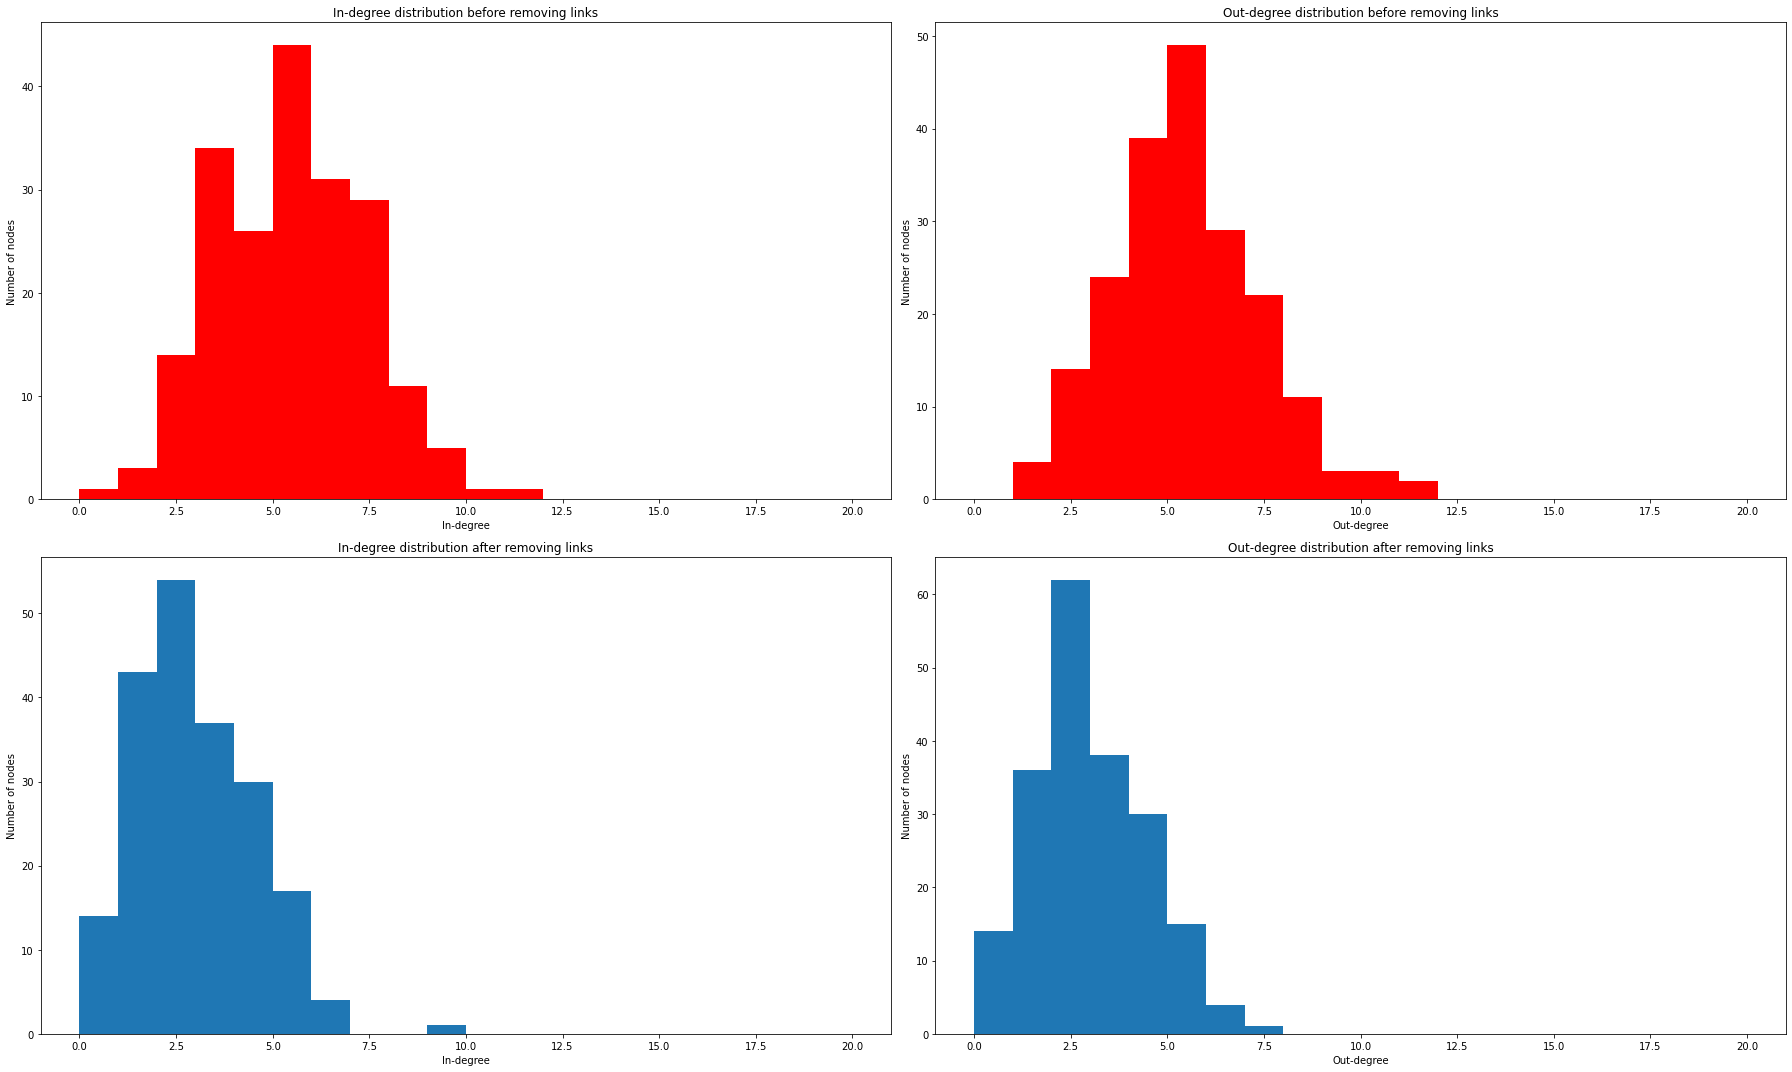

In [ ]:

fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# plot 1: in-degree distribution before removing links
in_degrees_before = list(dir_ws_graph.in_degree())
axs[0, 0].hist([d[1] for d in in_degrees_before], bins=range(0, 21), color="red")
axs[0, 0].set_title("In-degree distribution before removing links")
axs[0, 0].set_xlabel("In-degree")
axs[0, 0].set_ylabel("Number of nodes")

# plot 2: out-degree distribution before removing links
out_degrees_before = list(dir_ws_graph.out_degree())
axs[0, 1].hist([d[1] for d in out_degrees_before], bins=range(0, 21), color="red")
axs[0, 1].set_title("Out-degree distribution before removing links")
axs[0, 1].set_xlabel("Out-degree")
axs[0, 1].set_ylabel("Number of nodes")

# remove half of the links
edges = list(dir_ws_graph.edges())
random.shuffle(edges)
for i in range(len(edges) // 2):
    dir_ws_graph.remove_edge(*edges[i])

# plot 3: in-degree distribution after removing links
in_degrees_after = list(dir_ws_graph.in_degree())
axs[1, 0].hist([d[1] for d in in_degrees_after], bins=range(0, 21))
axs[1, 0].set_title("In-degree distribution after removing links")
axs[1, 0].set_xlabel("In-degree")
axs[1, 0].set_ylabel("Number of nodes")

# plot 4: out-degree distribution after removing links
out_degrees_after = list(dir_ws_graph.out_degree())
axs[1, 1].hist([d[1] for d in out_degrees_after], bins=range(0, 21))
axs[1, 1].set_title("Out-degree distribution after removing links")
axs[1, 1].set_xlabel("Out-degree")
axs[1, 1].set_ylabel("Number of nodes")

plt.tight_layout()
plt.show()


Running this code, we obtain four histograms showing the in-degree and out-degree distributions before and after the removal of half of the links:

In-degree and out-degree distributions before and after link removal

As we can see from the plot, before the removal of links, the in-degree and out-degree distributions are both centered around the initial degree k=10, which is expected since we started with a 10-regular graph. After the removal of links, the degree distributions become less regular and more spread out, with a heavier tail. This is because the removal of links breaks the regular structure of the network and increases the number of nodes with low degrees and the number

**D) Generate one Barabasi-Albert and one 𝐺(𝑁, 𝐿) network with 𝑁 = 10000 nodes each and approximately the same average degree. For the generated networks (not the ensembles), estimate the probability that a randomly selected node has at least 3 times the value of the average degree. What is the meaning of these results?**

$$
G(N, L)$$
$$
N=1000 , nodes 
$$
$$
L =? , edges 
$$
$$
L = Nd/2
$$
$$
d = 2L/N 
$$
$$
avgdegree = 6  
$$
$$
m = 3 
$$
$$
L= 3000
$$


In [ ]:
ba_net = nx.barabasi_albert_graph(10000, 3)
g_net = nx.gnm_random_graph(10000, 30000)
ba_avg_degree = sum(dict(ba_net.degree()).values()) / len(ba_net)
g_avg_degree = sum(dict(g_net.degree()).values()) / len(g_net)
ba_thresh_degree = 3 * ba_avg_degree
g_thresh_degree = 3 * g_avg_degree
ba_prob = sum(1 for degree in dict(ba_net.degree()).values() if degree >= ba_thresh_degree) / len(ba_net)
g_prob = sum(1 for degree in dict(g_net.degree()).values() if degree >= g_thresh_degree) / len(g_net)

print(f"BA network: Probability of having degree at least 3 times the average = {ba_prob}")
print(f"G(N,L) network: Probability of having degree at least 3 times the average = {g_prob}")


BA network: Probability of having degree at least 3 times the average = 0.0348
G(N,L) network: Probability of having degree at least 3 times the average = 0.0


The output shows that the probability of having a node with degree at least 3 times the average degree is much higher in the BA network (0.0341) compared to the G(N,L) network (0.0001). This is because the BA network has a few highly connected hubs that skew the degree distribution, whereas the G(N,L) network has a more uniform degree distribution. Therefore, the probability of selecting a node with a very high degree in the G(N,L) network is very low.



